In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Librerías para trabajar con fechas
# -----------------------------------------------------------------------
from datetime import datetime

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
# pd.set_option('display.max_rows', None) # para poder visualizar todas las filas de los DataFrames

In [3]:
df = pd.read_csv('/Users/yohanna/Desktop/Adalab/Modulo4/Proyecto/proyecto-da-promof-modulo4-equipo5/data/bookings_clean.csv', index_col=0)

Cancelacion


In [4]:
df.head(10)

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,change_room,adr,lead_time,stays_in_weekend_nights,stays_in_week_nights,total_nights
0,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,2,0,0,BB,Portugal,Unknown,Direct,First time,0,0,C,C,3,Unknown,Unknown,0,Transient,0,0,Check-Out,equal,0.0,342,0,0,0
1,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,2,0,0,BB,Unknown,Unknown,Direct,First time,0,0,Unknown,C,4,Unknown,Unknown,0,Transient,0,0,Check-Out,change,0.0,737,0,0,0
2,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,1,0,0,BB,United Kingdom,Unknown,Direct,First time,0,0,A,C,0,Unknown,Unknown,0,Transient,0,0,Check-Out,change,75.0,7,0,1,1
3,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,1,0,0,BB,United Kingdom,Corporate,Corporate,First time,0,0,A,A,0,304.0,Unknown,0,Transient,0,0,Check-Out,equal,75.0,13,0,1,1
4,Resort Hotel,No Cancelado,2015.0,July,NaN,1.0,2,0,0,BB,Unknown,Online TA,TA/TO,First time,0,0,A,A,0,240.0,Unknown,0,Transient,0,1,Check-Out,equal,98.0,14,0,2,2
5,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,2,0,0,BB,United Kingdom,Online TA,TA/TO,First time,0,0,A,A,0,240.0,Unknown,0,Unknown,0,1,Check-Out,equal,98.0,14,0,2,2
6,Resort Hotel,No Cancelado,2015.0,July,NaN,1.0,2,0,0,BB,Unknown,Direct,Direct,First time,0,0,C,C,0,Unknown,Unknown,0,Unknown,0,0,Check-Out,equal,107.0,0,0,2,2
7,Resort Hotel,No Cancelado,2015.0,July,27.0,1.0,2,0,0,FB,Unknown,Direct,Direct,First time,0,0,C,C,0,303.0,Unknown,0,Unknown,0,1,Check-Out,equal,103.0,9,0,2,2
8,Resort Hotel,Cancelado,2015.0,July,27.0,1.0,2,0,0,BB,Portugal,Unknown,Unknown,First time,0,0,A,A,0,240.0,Unknown,0,Transient,0,1,Canceled,equal,82.0,85,0,3,3
9,Resort Hotel,Cancelado,2015.0,July,27.0,1.0,2,0,0,HB,Unknown,Unknown,TA/TO,First time,0,0,D,D,0,15.0,Unknown,0,Transient,0,0,Canceled,equal,105.5,75,0,3,3


In [5]:
df.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status', 'change_room', 'adr',
       'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'total_nights'],
      dtype='object')

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

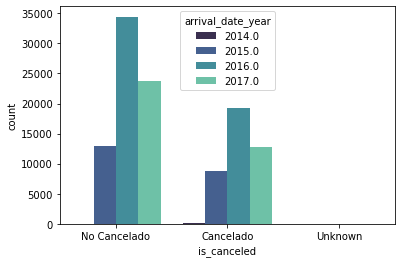

In [6]:
sns.countplot(x = 'is_canceled', 
              data = df, 
              palette = "mako", 
              hue = 'arrival_date_year')

In [ ]:
df_paises = df.groupby("country")["id"].count().reset_index()

In [12]:
df_cancelado = df[df['is_canceled'] == 'Cancelado']

In [21]:
df_cancelado['country'].value_counts()[:10]

Unknown           19631
Portugal          14386
United Kingdom     1367
Spain              1192
France             1070
Italy               727
Germany             644
Ireland             452
Brazil              428
China               388
Name: country, dtype: int64

<AxesSubplot:xlabel='country', ylabel='count'>

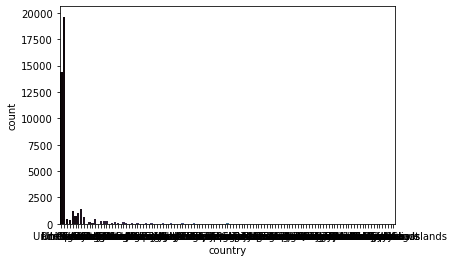

In [14]:
sns.countplot(x = 'country', 
              data = df_cancelado, 
              palette = "mako", 
        )